In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

qualifying = pd.read_csv('qualifying.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")

qualifying.head()


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [2]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [3]:
# combine the necessary csvs
my_quali = pd.merge(qualifying, results, on=['raceId', 'driverId', 'constructorId'], how = 'left')
my_quali.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
my_quali.head()

,qualifyId,raceId,driverId,constructorId,number_x,position_x,q1,q2,q3,resultId,...,positionOrder,points,laps,time,race_time,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,1.0,...,1.0,10.0,58.0,1:34:50.616,5690616,39,2,1:27.452,218.300,1.0
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,9.0,...,9.0,0.0,47.0,\N,\N,15,9,1:28.753,215.100,4.0
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,5.0,...,5.0,4.0,58.0,+18.014,5708630,43,1,1:27.418,218.385,1.0
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,13.0,...,13.0,0.0,29.0,\N,\N,23,6,1:28.175,216.510,5.0
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,2.0,...,2.0,8.0,58.0,+5.478,5696094,41,3,1:27.739,217.586,1.0


In [4]:
# retain only the columns we need 
selected_columns = ['raceId', 'driverId', 'constructorId', 'q1', 'q2', 'q3', 'race_time', 'grid', 'position_y']
quali = my_quali[selected_columns]

quali = quali.copy()
quali.rename(columns = {'position_y': 'final_pos' }, inplace = True)

quali.head()

,raceId,driverId,constructorId,q1,q2,q3,race_time,grid,final_pos
0,18,1,1,1:26.572,1:25.187,1:26.714,5690616,1.0,1
1,18,9,2,1:26.103,1:25.315,1:26.869,\N,2.0,\N
2,18,5,1,1:25.664,1:25.452,1:27.079,5708630,3.0,5
3,18,13,6,1:25.994,1:25.691,1:27.178,\N,4.0,\N
4,18,2,2,1:25.960,1:25.518,1:27.236,5696094,5.0,2


In [5]:
# this is to analyze how grid position influences final position
grid_cols = ['raceId', 'driverId', 'constructorId', 'grid', 'final_pos']

grid_final = quali[grid_cols]
grid_final.head()

,raceId,driverId,constructorId,grid,final_pos
0,18,1,1,1.0,1
1,18,9,2,2.0,\N
2,18,5,1,3.0,5
3,18,13,6,4.0,\N
4,18,2,2,5.0,2


In [6]:
grid_final = grid_final.copy()

# remove null values
grid_final.replace('\\N', np.nan, inplace=True)
grid_final.dropna(inplace=True)
grid_final.head()

,raceId,driverId,constructorId,grid,final_pos
0,18,1,1,1.0,1
2,18,5,1,3.0,5
4,18,2,2,5.0,2
6,18,3,3,7.0,3
11,18,4,4,11.0,4


In [7]:
# We can't remove missing values because, people are eliminated in each round of qualifying
# So we need to separate these values into 3 different data frames.

# Q1
q1_cols = ['raceId', 'driverId', 'constructorId', 'q1', 'race_time', 'grid', 'final_pos']
q1 = quali[q1_cols]

q1 = q1.copy()

# remove null values
q1.replace('\\N', np.nan, inplace=True)
q1.dropna(inplace=True)

q1.head()
q1.describe()

,raceId,driverId,constructorId,grid
count,4311.000000,4311.000000,4311.000000,4311.000000
mean,662.727673,323.213640,40.401067,7.689399
std,423.217620,390.990783,66.502013,5.262949
min,1.000000,1.000000,1.000000,0.000000
25%,125.000000,10.000000,4.000000,3.000000
50%,888.000000,25.000000,7.000000,7.000000
75%,1013.000000,821.000000,22.000000,11.000000
max,1115.000000,859.000000,214.000000,24.000000


In [8]:
# Q2
q2_cols = ['raceId', 'driverId', 'constructorId', 'q2', 'race_time', 'grid', 'final_pos']
q2 = quali[q2_cols]

q2 = q2.copy()

# remove null values
q2.replace('\\N', np.nan, inplace=True)
q2.dropna(inplace=True)

q2.head()
q2.describe()

,raceId,driverId,constructorId,grid
count,3272.000000,3272.000000,3272.000000,3272.000000
mean,744.765281,355.466993,43.856968,6.860636
std,397.258082,400.219443,68.293205,4.435497
min,1.000000,1.000000,1.000000,0.000000
25%,350.000000,8.000000,4.000000,3.000000
50%,914.000000,21.000000,9.000000,6.000000
75%,1025.000000,822.000000,51.000000,10.000000
max,1115.000000,859.000000,214.000000,24.000000


In [9]:
# Q3
q3_cols = ['raceId', 'driverId', 'constructorId', 'q3', 'race_time', 'grid', 'final_pos']
q3 = quali[q3_cols]

q3 = q3.copy()

# remove null values
q3.replace('\\N', np.nan, inplace=True)
q3.dropna(inplace=True)

q3.head()
q3.describe()

,raceId,driverId,constructorId,grid
count,2431.000000,2431.000000,2431.000000,2431.000000
mean,750.123406,326.403538,43.519951,4.993418
std,397.042709,396.607241,66.334260,3.091199
min,1.000000,1.000000,1.000000,0.000000
25%,351.500000,5.000000,4.000000,2.000000
50%,930.000000,20.000000,9.000000,5.000000
75%,1025.000000,822.000000,117.000000,7.000000
max,1115.000000,859.000000,214.000000,24.000000


In [10]:
# need to convert the q1, q2, and q3 times to milliseconds because we can't analyze them in the current  format

def time_format(time_str):
    # Check if the input is a string
    if not isinstance(time_str, str):
        return None

    # Check if both ":" and "." are present in the string
    if ':' in time_str and '.' in time_str:
        minutes, rest = time_str.split(':')
        seconds, milliseconds = rest.split('.')
        total_milliseconds = int(minutes) * 60000 + int(seconds) * 1000 + int(milliseconds)
    else:
        # Return NaN or a placeholder value for rows that don't match the expected format
        total_milliseconds = None
    return total_milliseconds




In [11]:
# WARNING: Running this cell twice redoes the function resulting in None values
# Convert columns to milliseconds
quali = quali.copy()

# remove null values
quali.replace('\\N', np.nan, inplace=True)
quali.dropna(inplace=True)

quali['q1'] = quali['q1'].apply(time_format)
quali['q2'] = quali['q2'].apply(time_format)
quali['q3'] = quali['q3'].apply(time_format)
q1['q1'] = q1['q1'].apply(time_format)
q2['q2'] = q2['q2'].apply(time_format)
q3['q3'] = q3['q3'].apply(time_format)

,raceId,driverId,constructorId,q1,race_time,grid,final_pos
0,18,1,1,86572,5690616,1.0,1
2,18,5,1,85664,5708630,3.0,5
4,18,2,2,85960,5696094,5.0,2
6,18,3,3,86295,5698779,7.0,3
11,18,4,4,86907,5707797,11.0,4


In [20]:
q3.head()

,raceId,driverId,constructorId,q3,race_time,grid,final_pos
0,18,1,1,86714,5690616,1.0,1
2,18,5,1,87079,5708630,3.0,5
4,18,2,2,87236,5696094,5.0,2
6,18,3,3,88687,5698779,7.0,3
23,19,8,6,96230,5478555,2.0,1


In [21]:
print(quali['race_time'].dtype)
quali['race_time'] = quali['race_time'].astype(int)
print(quali['race_time'].dtype)

print(q1['race_time'].dtype)
q1['race_time'] = q1['race_time'].astype(int)
print(q1['race_time'].dtype)

print(q2['race_time'].dtype)
q2['race_time'] = q2['race_time'].astype(int)
print(q2['race_time'].dtype)

print(q3['race_time'].dtype)
q3['race_time'] = q3['race_time'].astype(int)
print(q3['race_time'].dtype)

int64
int64
object
int64
object
int64
object
int64


In [47]:
print(quali['grid'].dtype)
quali['grid'] = quali['grid'].astype(int)
print(quali['grid'].dtype)

float64
int64


In [48]:
print(quali['final_pos'].dtype)
quali['final_pos'] = quali['final_pos'].astype(int)
print(quali['final_pos'].dtype)

object
int64


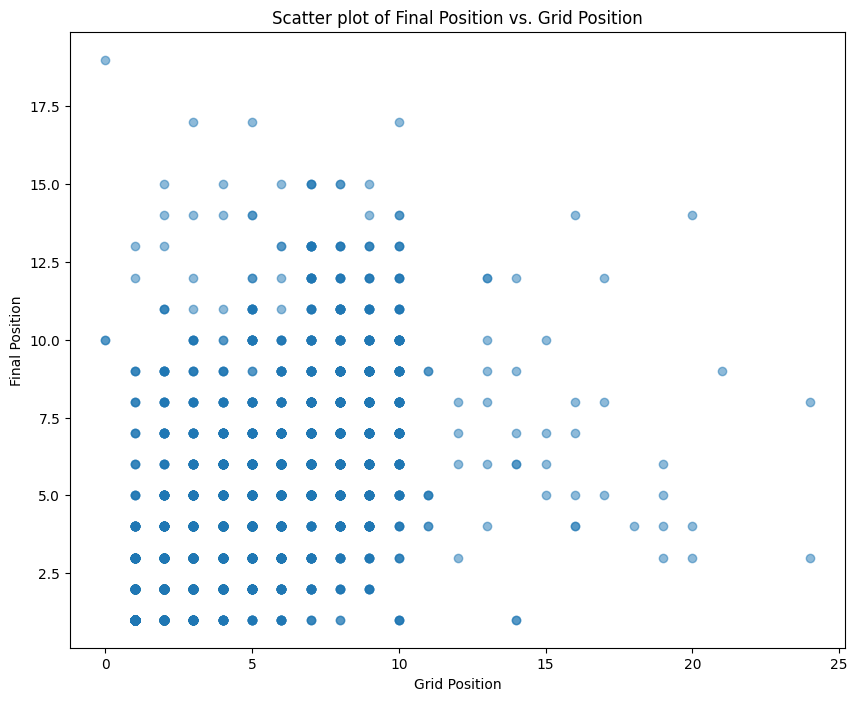

In [49]:
# Scatter plot of grid position and final position
plt.figure(figsize = (10, 8))  
plt.scatter(quali['grid'], quali['final_pos'], alpha = 0.5, )
plt.title(f'Scatter plot of Final Position vs. Grid Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.show()

In [41]:
import pymc as pm
import arviz as az
import scipy.stats as sts
import pytensor.tensor as pt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [50]:
# Linear Model with Student T likelihood
with pm.Model() as linear_model:
    # Priors
    a = pm.Uniform('a', lower = 0, upper = 100)
    b = pm.Normal('b', mu = 0, sigma = 10)
    nu = pm.HalfNormal('nu', sigma = 30)  # degrees of freedom for Student's T
    sigma = pm.Uniform('sigma', 0, 30)
    
    # Data
    x = pm.MutableData('x', quali['grid'])
    y = pm.MutableData('y', quali['final_pos'])

    # Regression Mean (Linear Function)
    mu = pm.Deterministic('mu', a + b * x)
    
    # Likelihood using Student's T
    pm.StudentT('likelihood', nu = nu, mu = mu, sigma = sigma, observed = y)
    
    # Sampling
    linear_trace = pm.sample(tune = 1000, draws = 1000, chains = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, nu, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 98 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,1.089,0.079,0.936,1.235,0.002,0.001,1619.0,1702.0,1.00
b,0.675,0.015,0.646,0.704,0.000,0.000,1634.0,2095.0,1.00
nu,2.898,0.214,2.504,3.299,0.005,0.003,2023.0,2501.0,1.00
sigma,1.631,0.048,1.543,1.720,0.001,0.001,1923.0,2114.0,1.01


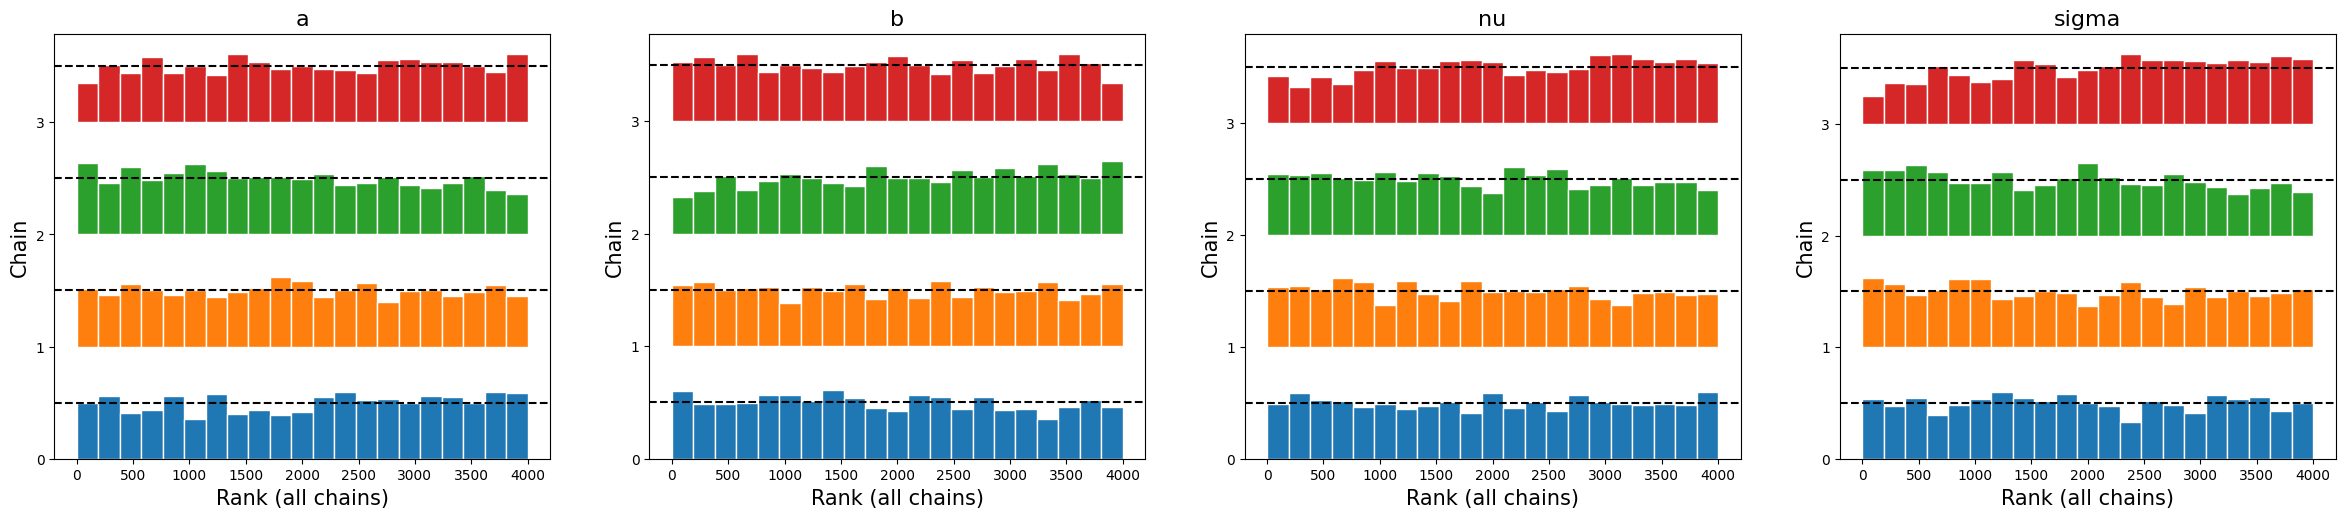

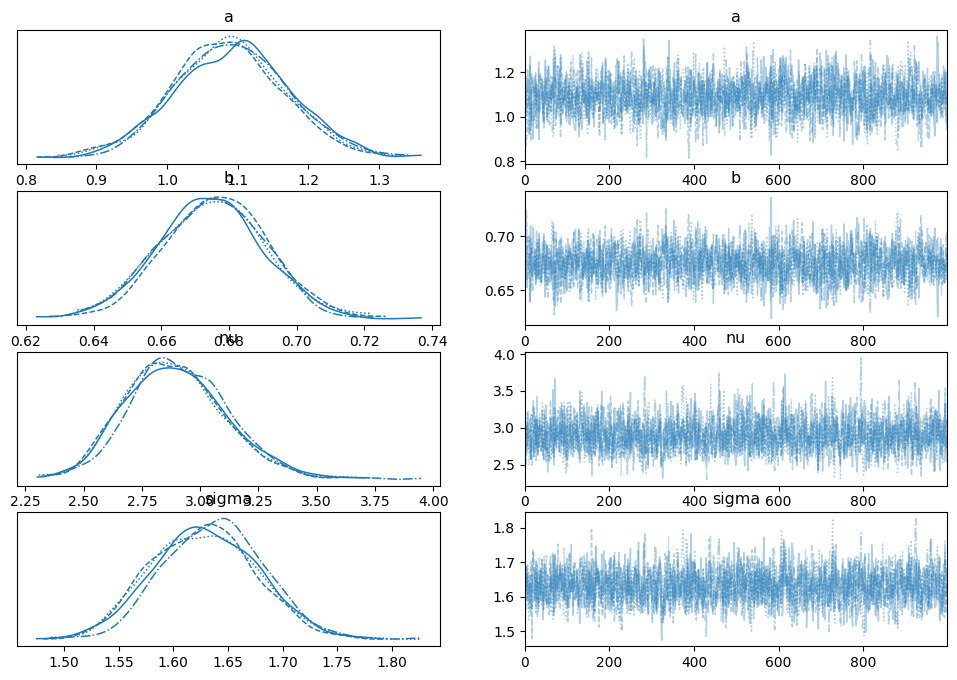

In [51]:
az.plot_rank(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])
az.plot_trace(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])
az.summary(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


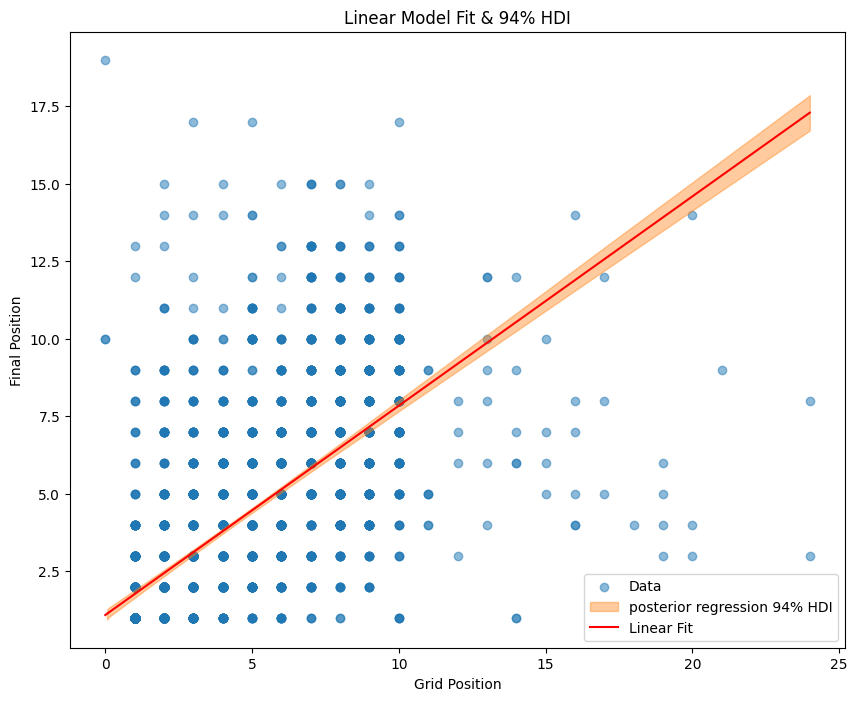

In [52]:
# Compute mean values for a and b
a_samples = linear_trace.posterior['a'].values.flatten()
b_samples = linear_trace.posterior['b'].values.flatten()

a_mean = a_samples.mean()
b_mean = b_samples.mean()

# Predicted values using the mean parameter estimates
x_vals = np.linspace(min(quali['grid']), 
                     max(quali['grid']), 1000)
y_vals = a_mean + b_mean * x_vals

# Compute posterior distributions of the predictions
posterior_mu = (a_samples[:, None] + b_samples[:, None] * x_vals)

# Plot the data with the line of best fit & HDI
plt.figure(figsize = (10, 8))
plt.scatter(quali['grid'], 
            quali['final_pos'], label = 'Data', alpha = 0.5)
az.plot_hdi(x_vals, posterior_mu, hdi_prob = 0.94, color = 'C1', 
            fill_kwargs = {'alpha': 0.4, 'label': 'posterior regression 94% HDI'})
plt.plot(x_vals, y_vals, c = 'red', label = 'Linear Fit') # the line
plt.title('Linear Model Fit & 94% HDI')
plt.xlabel('Grid Position')
plt.ylabel('Final Position')
plt.legend()
plt.show()

In [22]:
# This Cell needs to be fixed , for now, run it twice so that you don't see the plots from the pitstops ipynb
import import_ipynb
from Pitstops import plot_histograms

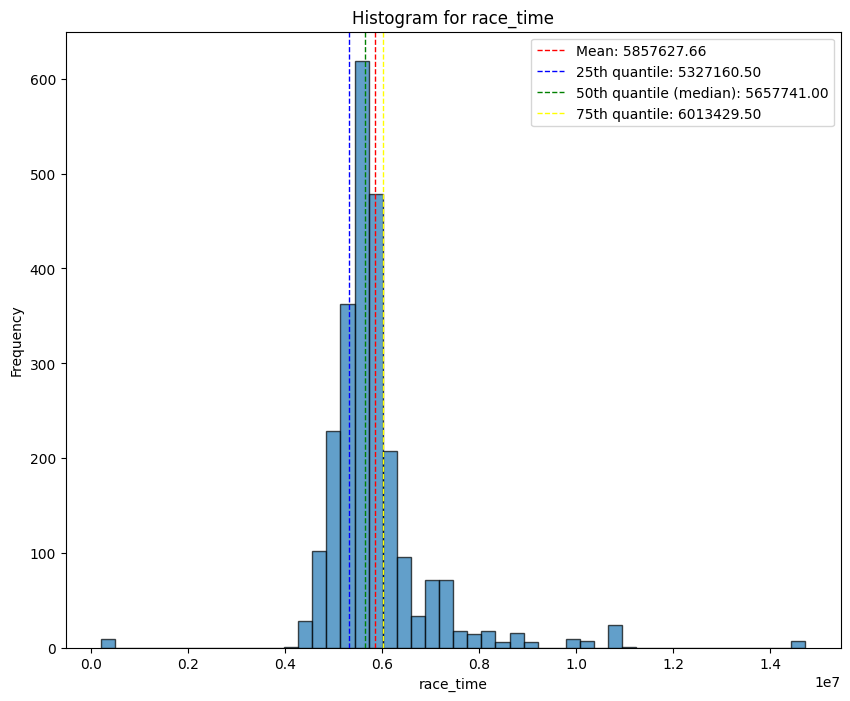

In [25]:
result = plot_histograms(quali, exclude_columns=['raceId', 'driverId', 'constructorId', 'final_pos', 'grid', 'q1', 'q2', 'q3'])

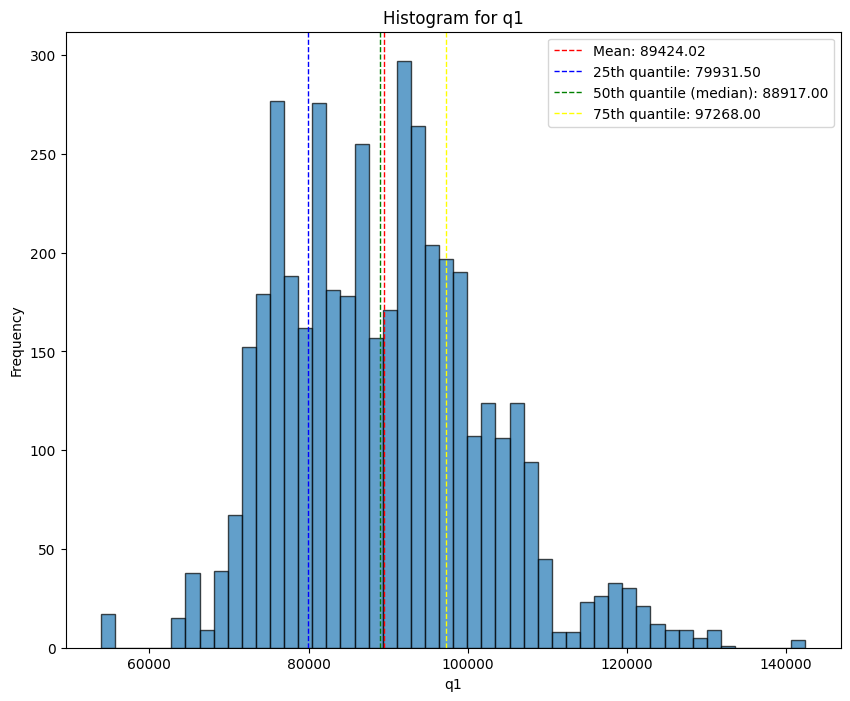

In [27]:
result = plot_histograms(q1, exclude_columns=['raceId', 'driverId', 'constructorId', 'final_pos', 'grid', 'race_time'])

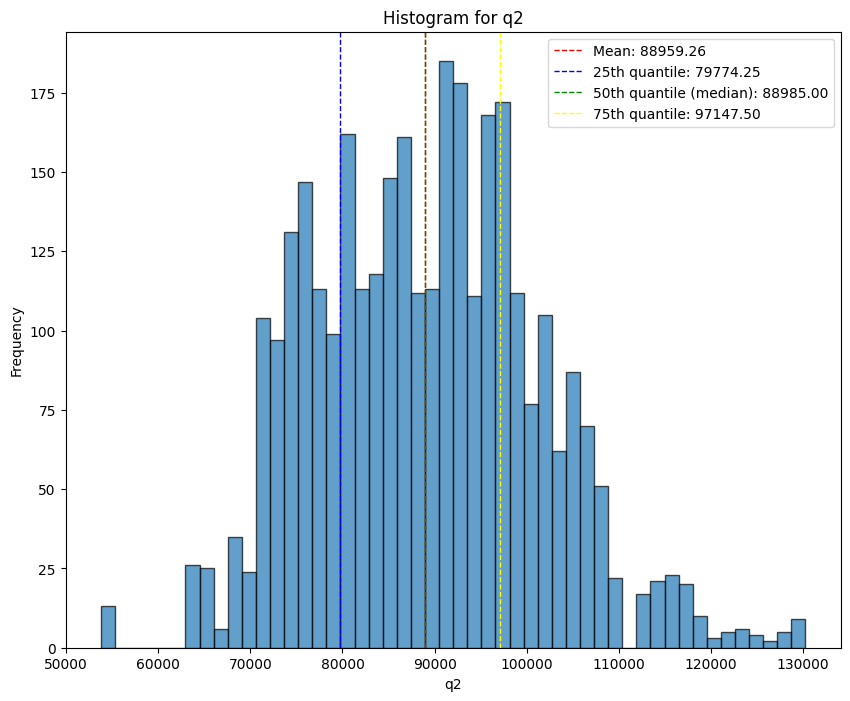

In [28]:
result = plot_histograms(q2, exclude_columns=['raceId', 'driverId', 'constructorId', 'final_pos', 'grid', 'race_time'])

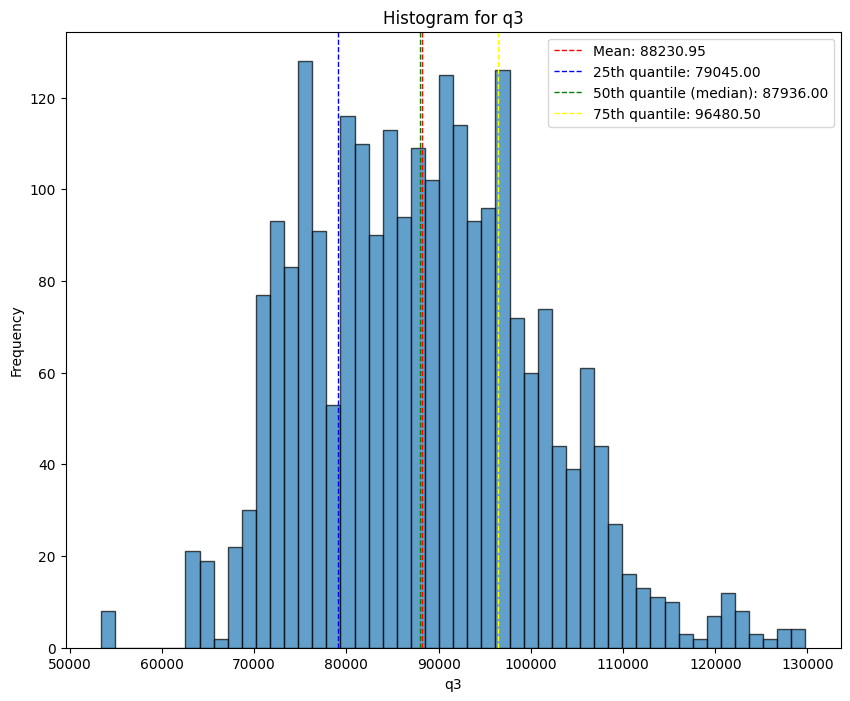

In [29]:
result = plot_histograms(q3, exclude_columns=['raceId', 'driverId', 'constructorId', 'final_pos', 'grid', 'race_time'])

In [30]:
quali.describe()

,raceId,driverId,constructorId,q1,q2,q3,race_time,grid
count,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2431.000000,2.431000e+03,2431.000000
mean,750.123406,326.403538,43.519951,88779.431098,88070.792678,88230.948581,5.857628e+06,4.993418
std,397.042709,396.607241,66.334260,12264.256001,12014.428809,12329.465024,1.118260e+06,3.091199
min,1.000000,1.000000,1.000000,53904.000000,53787.000000,53377.000000,2.070710e+05,0.000000
25%,351.500000,5.000000,4.000000,79302.000000,78829.000000,79045.000000,5.327160e+06,2.000000
50%,930.000000,20.000000,9.000000,88285.000000,87712.000000,87936.000000,5.657741e+06,5.000000
75%,1025.000000,822.000000,117.000000,96993.500000,96521.000000,96480.500000,6.013430e+06,7.000000
max,1115.000000,859.000000,214.000000,131081.000000,129272.000000,129776.000000,1.472999e+07,24.000000


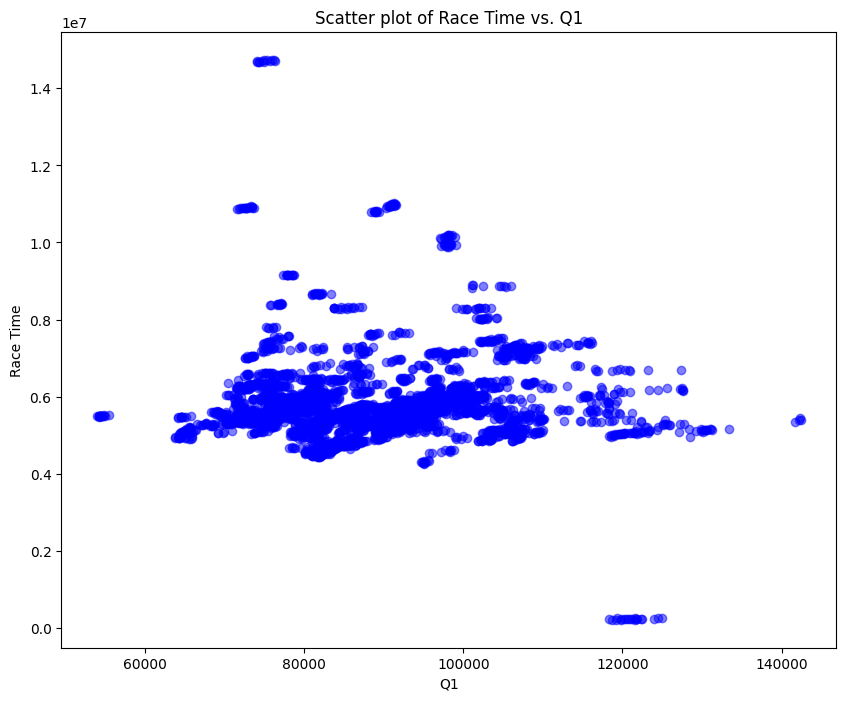

In [31]:
# q1 vs race_time scatter
plt.figure(figsize = (10, 8))  
plt.scatter(q1['q1'], q1['race_time'], color = 'blue', alpha = 0.5, )
plt.title(f'Scatter plot of Race Time vs. Q1')
plt.xlabel('Q1')
plt.ylabel('Race Time')
plt.show()

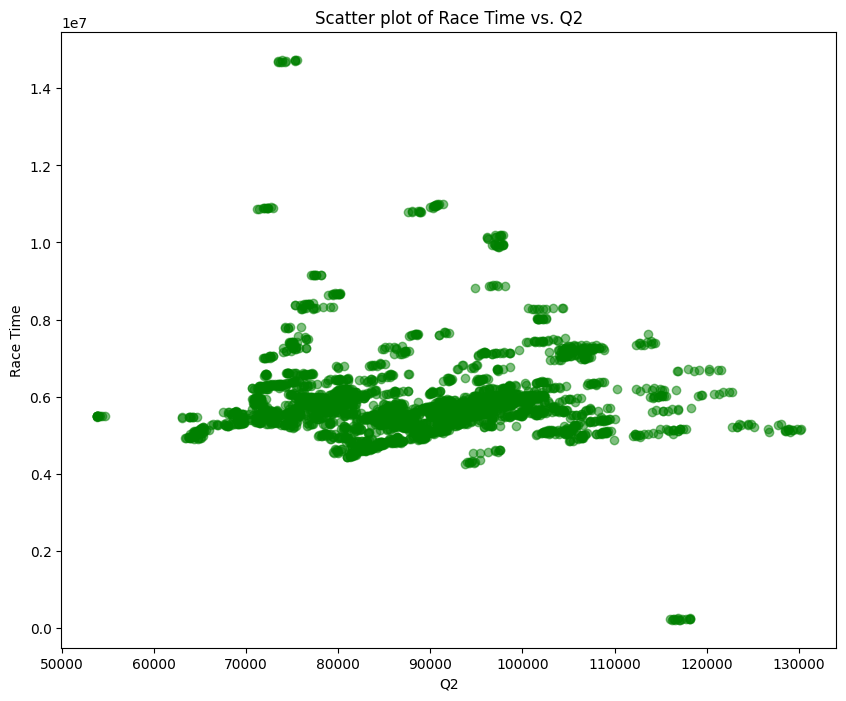

In [35]:
# q2 vs race_time scatter
plt.figure(figsize = (10, 8))  
plt.scatter(q2['q2'], q2['race_time'], color = 'green', alpha = 0.5, )
plt.title(f'Scatter plot of Race Time vs. Q2')
plt.xlabel('Q2')
plt.ylabel('Race Time')
plt.show()

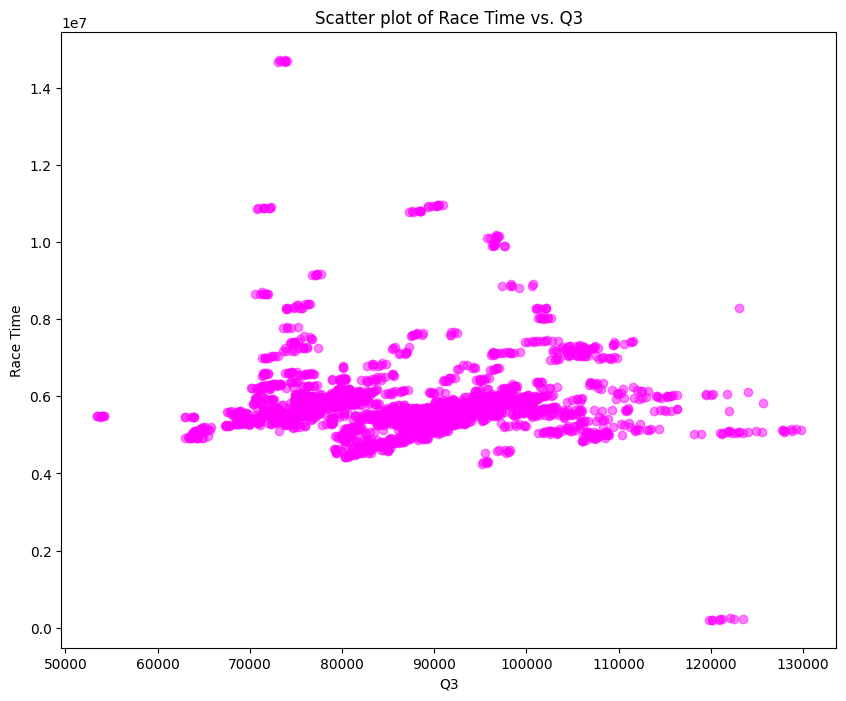

In [36]:
# q3 vs race_time scatter
plt.figure(figsize = (10, 8))  
plt.scatter(q3['q3'], q3['race_time'], color = 'magenta', alpha = 0.5, )
plt.title(f'Scatter plot of Race Time vs. Q3')
plt.xlabel('Q3')
plt.ylabel('Race Time')
plt.show()